# Explore here

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

artist_id = '49Z1AvGeUaBSanPaOmplK6'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(artist_id)

In [ ]:
canciones=[]
popularidad=[]
duracion=[]

for track in results['tracks'][:10]:
    print('track     :  ' + track['name'])
    canciones.append(track['name'])
    popularidad.append(track['popularity'])
    duracion.append(track['duration_ms']/(1000*60)%60)


track     :  Déjame Ir
track     :  Besos Usados
track     :  Magia (feat. Sebastián Yatra)
track     :  Tengo Ganas
track     :  Día Tras Día
track     :  Lo Mejor Que Hay en Mi Vida
track     :  Mejor Que A Ti Me Va - Versión Reggae
track     :  Por el Resto de Mi Vida
track     :  Conquistar El Planeta
track     :  Te Voy a Amar


In [9]:
df = pd.DataFrame()

df['Canciones']=canciones
df['Popularidad']=popularidad
df['Duracion']=duracion

df

,Canciones,Popularidad,Duracion
0,Déjame Ir,61,3.896433
1,Besos Usados,62,3.908433
2,Magia (feat. Sebastián Yatra),59,3.230883
3,Tengo Ganas,61,2.580500
4,Día Tras Día,60,4.095333
5,Lo Mejor Que Hay en Mi Vida,59,3.582000
6,Mejor Que A Ti Me Va - Versión Reggae,59,3.745100
7,Por el Resto de Mi Vida,59,3.754433
8,Conquistar El Planeta,57,2.713333
9,Te Voy a Amar,54,3.654000


In [12]:
df.sort_values(["Popularidad"], ascending=False, inplace = True)

print(df.head(3))

      Canciones  Popularidad  Duracion
1  Besos Usados           62  3.908433
0     Déjame Ir           61  3.896433
3   Tengo Ganas           61  2.580500


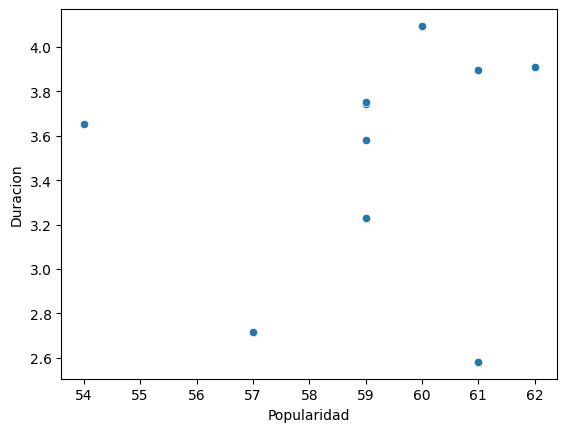

In [14]:
scatter_plot = sns.scatterplot(data = df, x = "Popularidad", y = "Duracion")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

Según la gráfica, no hay una relación entre popularidad y duración, es decir, la duración de la canción no incide en la popularidad.